# **Project**

The mental health issue of employees is becoming a major concern among Tech companies. It often is associated with lower productivity and less innovation industry-wise.
To understand this, the HR Department of Tech Companies have asked more than 50 questions to employees and recorded the answers. This project talks about ways to mitigate mental health issues among employees.




## **Importing libraries**

> Eingerückter Textblock



In [2]:

#import kaleido #required
#kaleido.__version__ #0.2.1

import plotly
plotly.__version__ #5.5.0

#now this works:
import plotly.graph_objects as go


import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns
from sklearn import datasets


## **Data Exploration**

### **Data load**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/superjuicepolo/Unsupervised-Learning-Task-1/main/mental-heath-in-tech-2016_20161114.csv')

# MHC : mental health condition


df = df.rename(columns={'What is your gender?': 'Gender',
                        'What is your age?': 'Age',
                        'What country do you live in?': 'Country',
                        'What US state or territory do you live in?': 'US_state_live',
                        'Do you work remotely?': 'Remote',
                        'What US state or territory do you work in?': 'US_state_work',
                        'Which of the following best describes your work position?' : 'work_pos',
                        'Have you been diagnosed with a mental health condition by a medical professional?' : 'Diagnosed_mhc_by_medical_professional',
                        'Are you self-employed?' : 'self-employed',
                        "Does your employer provide mental health benefits as part of healthcare coverage?" : "healthcare_coverage"
                        })


df = df[df['Age'] < 120 ]
df

df.loc[df['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude', na = False), 'Gender'] = 'M'
df.loc[~df['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude', na = False), 'Gender'] = 'F'

df = df[df['Age'] > 10]

In [4]:
df['Is your primary role within your company related to tech/IT?']

0       NaN
1       NaN
2       NaN
3       NaN
4       1.0
       ... 
1428    NaN
1429    NaN
1430    NaN
1431    1.0
1432    NaN
Name: Is your primary role within your company related to tech/IT?, Length: 1431, dtype: float64

#### **Index object containing the column names**

In [5]:
df.dtypes.index

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

#### **Identification of numeric columns**

In [6]:
# get all numeric columns
bools = []
col_num = []

for i, type in enumerate(df.dtypes):
    if type != 'object':
        bools.append(True)
        col_num.append(i)

    else:
        bools.append(False)
col_num = list(df.dtypes[col_num].index)
col_num

['self-employed',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you have previous employers?',
 'Have you ever sought treatment for a mental health issue from a mental health professional?',
 'Age']

In [ ]:
df[ 'Is your employer primarily a tech company/organization?'].value_counts()

1.0    881
0.0    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

**Identifying number of missing values**

In [7]:
df.isna().sum()

self-employed                                                      0
How many employees does your company or organization have?       287
Is your employer primarily a tech company/organization?          287
Is your primary role within your company related to tech/IT?    1168
healthcare_coverage                                              287
                                                                ... 
US_state_live                                                    592
What country do you work in?                                       0
US_state_work                                                    581
work_pos                                                           0
Remote                                                             0
Length: 63, dtype: int64

**showing first 4 rows**

In [8]:
df.head(4)

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,M,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,M,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes


## **Series containing the data types of each column in the DataFrame**

In [ ]:
df.dtypes

self-employed                                                     int64
How many employees does your company or organization have?       object
Is your employer primarily a tech company/organization?         float64
Is your primary role within your company related to tech/IT?    float64
healthcare_coverage                                              object
                                                                 ...   
US_state_live                                                    object
What country do you work in?                                     object
US_state_work                                                    object
work_pos                                                         object
Remote                                                           object
Length: 63, dtype: object

### **Data Visualization**



**Bar chart illustrating the distribution of company sizes based on the number of employees.**

<Axes: >

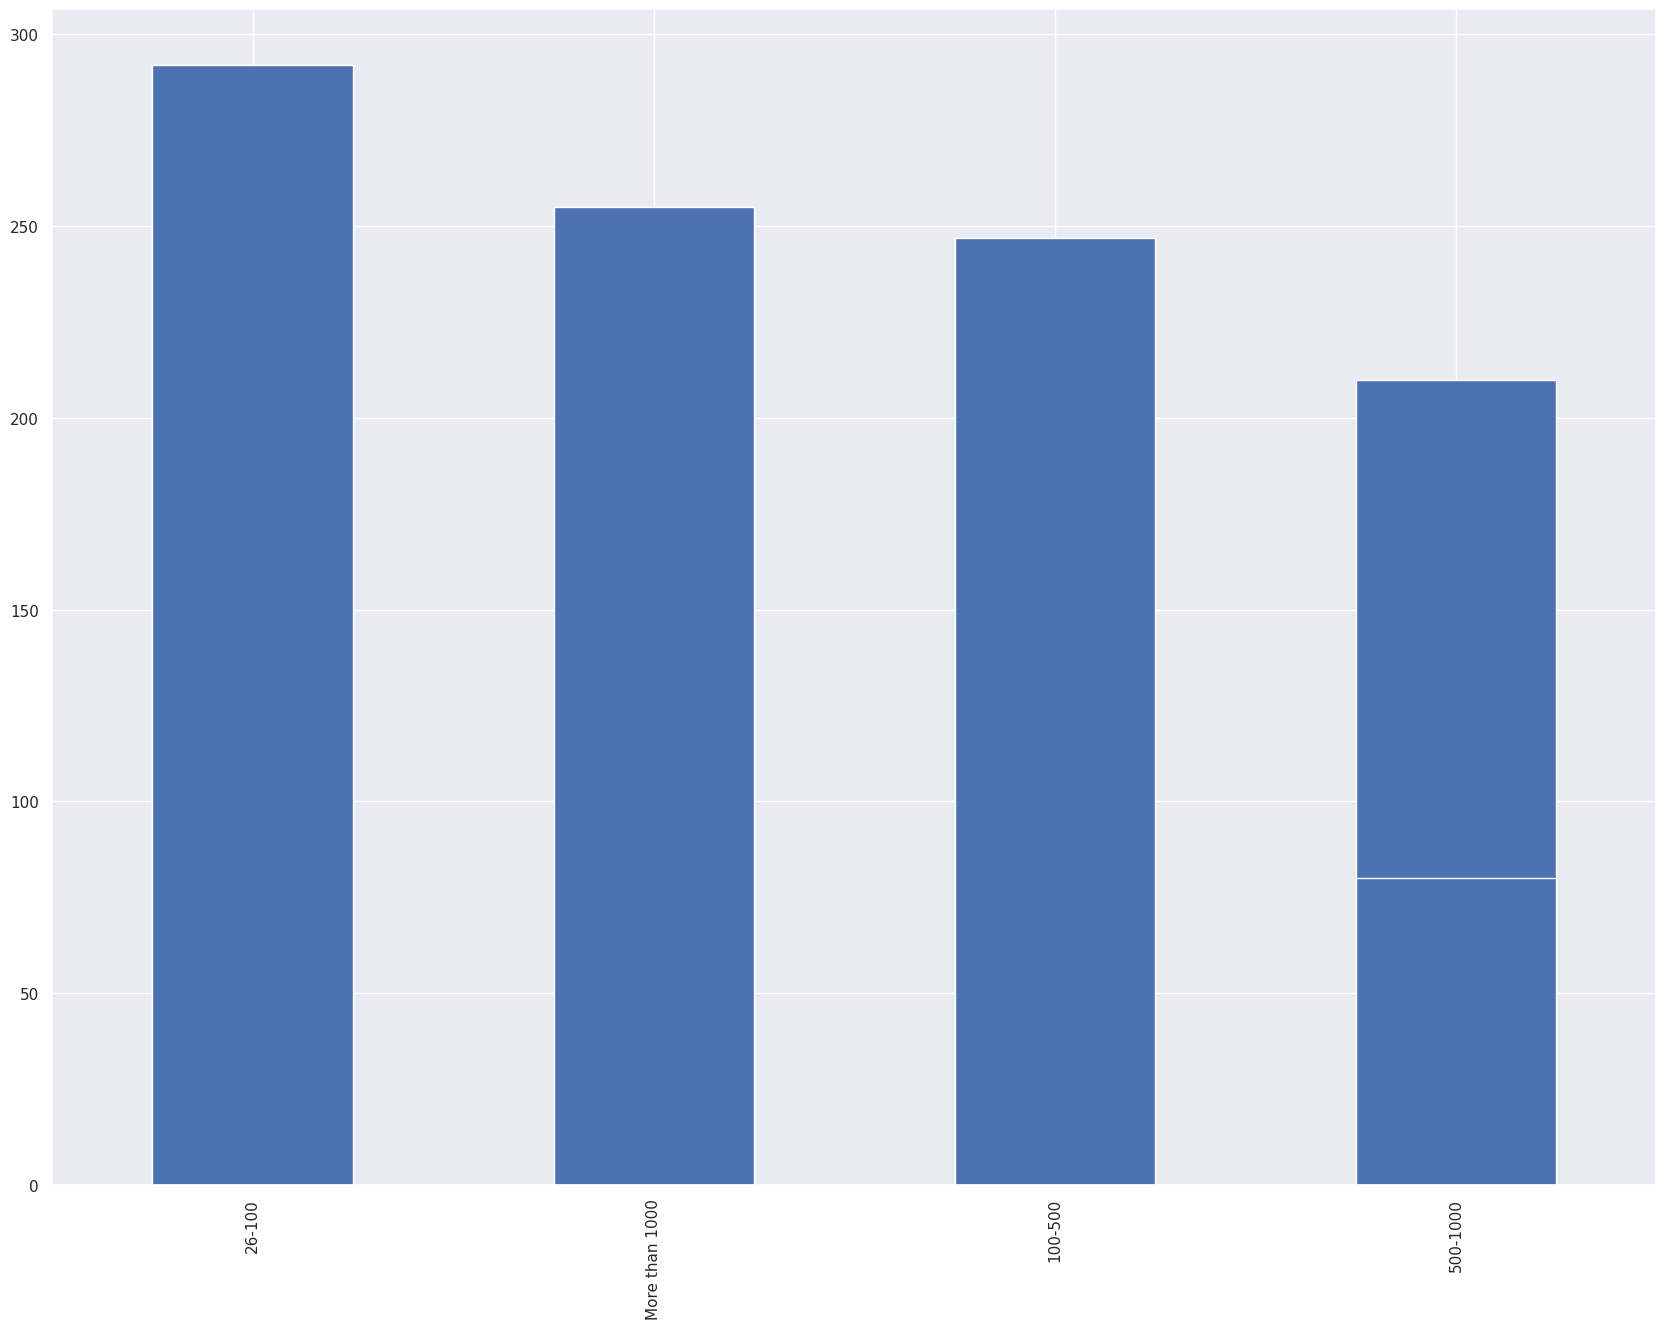

In [ ]:
df['How many employees does your company or organization have?'].value_counts().plot(kind = 'bar')

#df.loc[df['How many employees does your company or organization have?'] != 'Jun-25', '01-May',:]

df.loc[~df['How many employees does your company or organization have?'].isin(['Jun-25', '01-May']), 'How many employees does your company or organization have?'].value_counts().plot(kind = 'bar')
# Around almost 300 companies have from 26 to 100 employees, a little bit more than 250 have more than 1000 employees and a little bit less than 250 have from 100 to 500 employees. Last, around a little bit more than 200 companies have from 500 to 1000 employees.
# This shows us that a lot of companies like either having a lot of employees or not having too much of them.

## Creates a new DataFrame

In [ ]:
df_num = df[col_num]
df_num

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


**Creating a histogram using the matplotlib library to visualize the distribution of ages from the DataFrame**

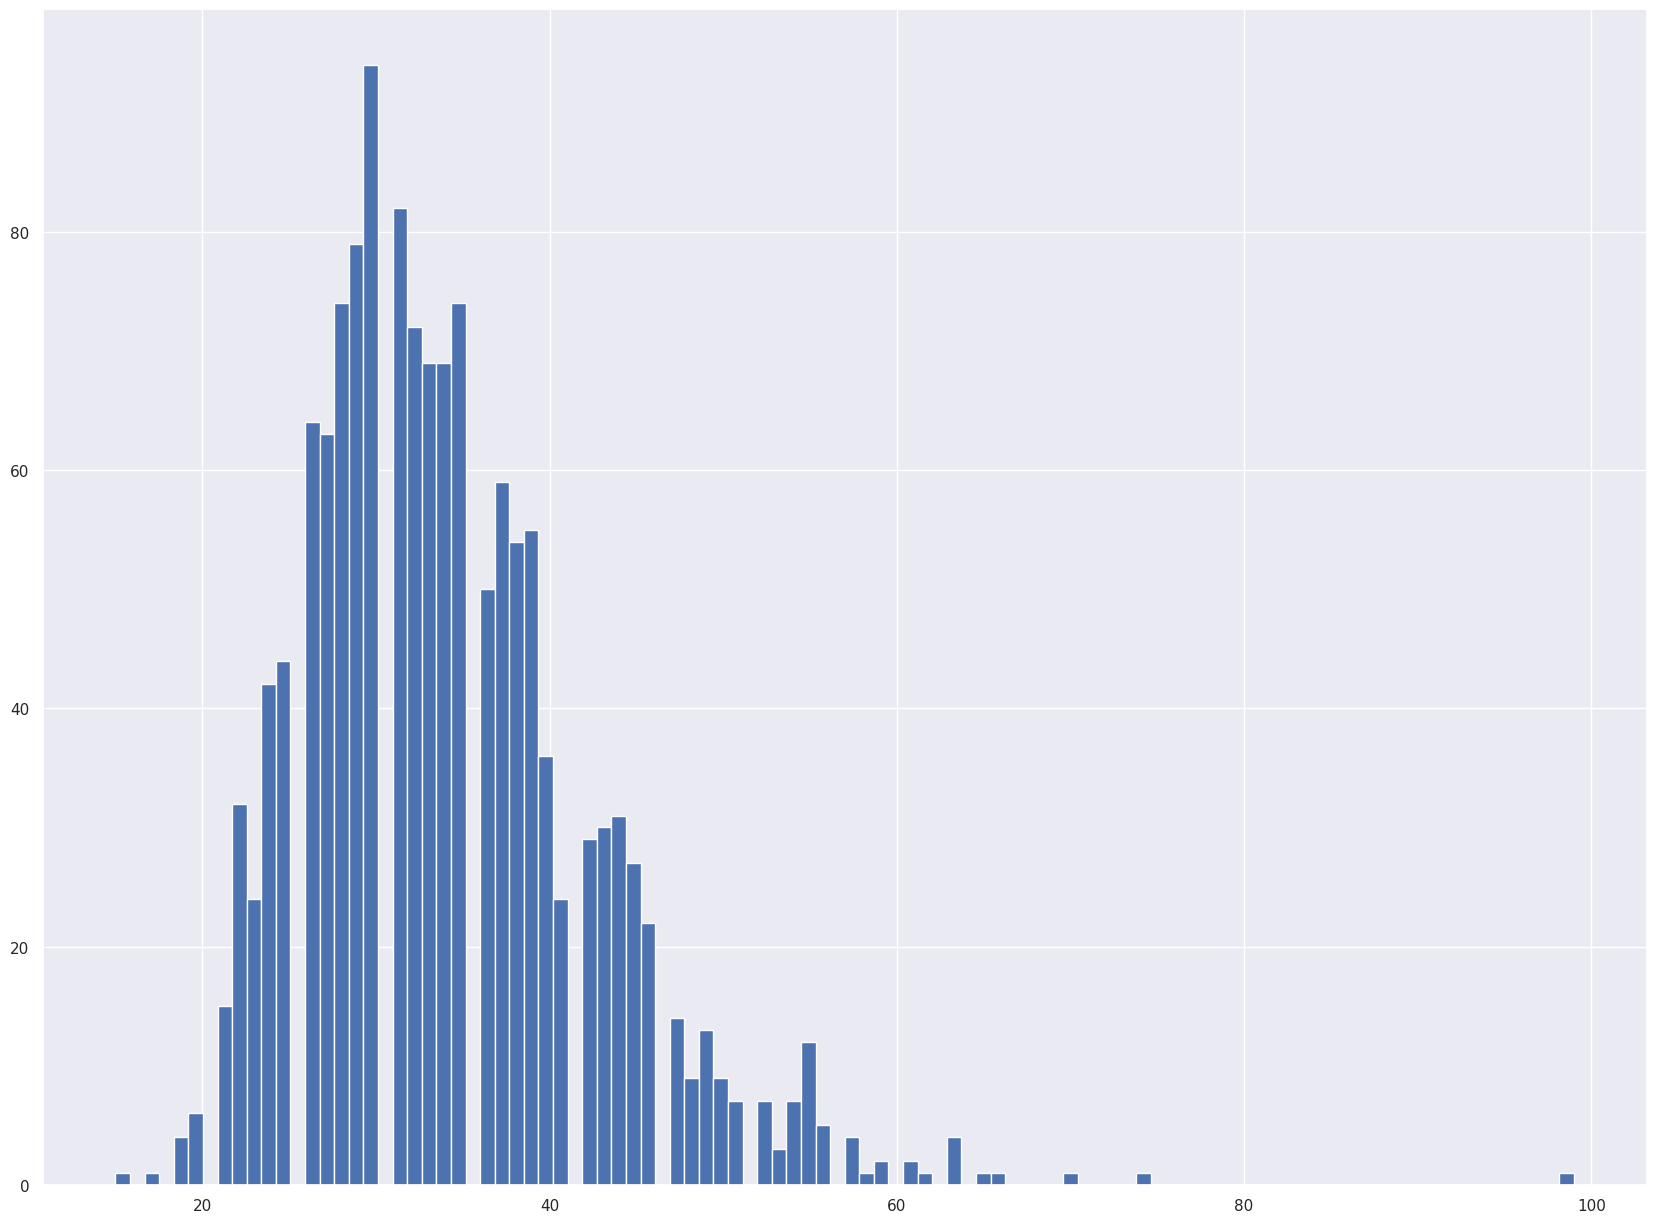

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_num['Age'], bins = 100);
# In order to analize better this graphic, we use as a help method the basic plot we have below. We also see already too, that there is a value after 300, which we now cant be accurate.
# We see already that the biggest part of the values acummulate between 20 and 50.

####  **Selection of rows where the 'Age' column has values greater than or equal to 100.**

In [ ]:
df_num[df_num['Age'] >= 100]

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age


#### **Filtering the DataFrame to select rows where the 'Age' column has values greater than 85.**

In [ ]:
df[df['Age'] > 85]

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
372,0,Jun-25,1.0,NaN,Yes,No,No,I don't know,Yes,Somewhat easy,...,Rarely,Often,99,F,United States of America,Michigan,United States of America,Michigan,Supervisor/Team Lead,Sometimes


####  **Generating descriptive statistics for the numerical columns in the DataFrame**

In [ ]:
df_num.describe()

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
count,1431.000000,1144.000000,263.000000,287.000000,1431.000000,1431.000000,1431.000000
mean,0.200559,0.770105,0.942966,0.644599,0.881901,0.585604,34.106219
std,0.400559,0.420949,0.232350,0.479471,0.322838,0.492790,8.285882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


###  **Creating a boxplot representing the distribution of ages within the dataset.**

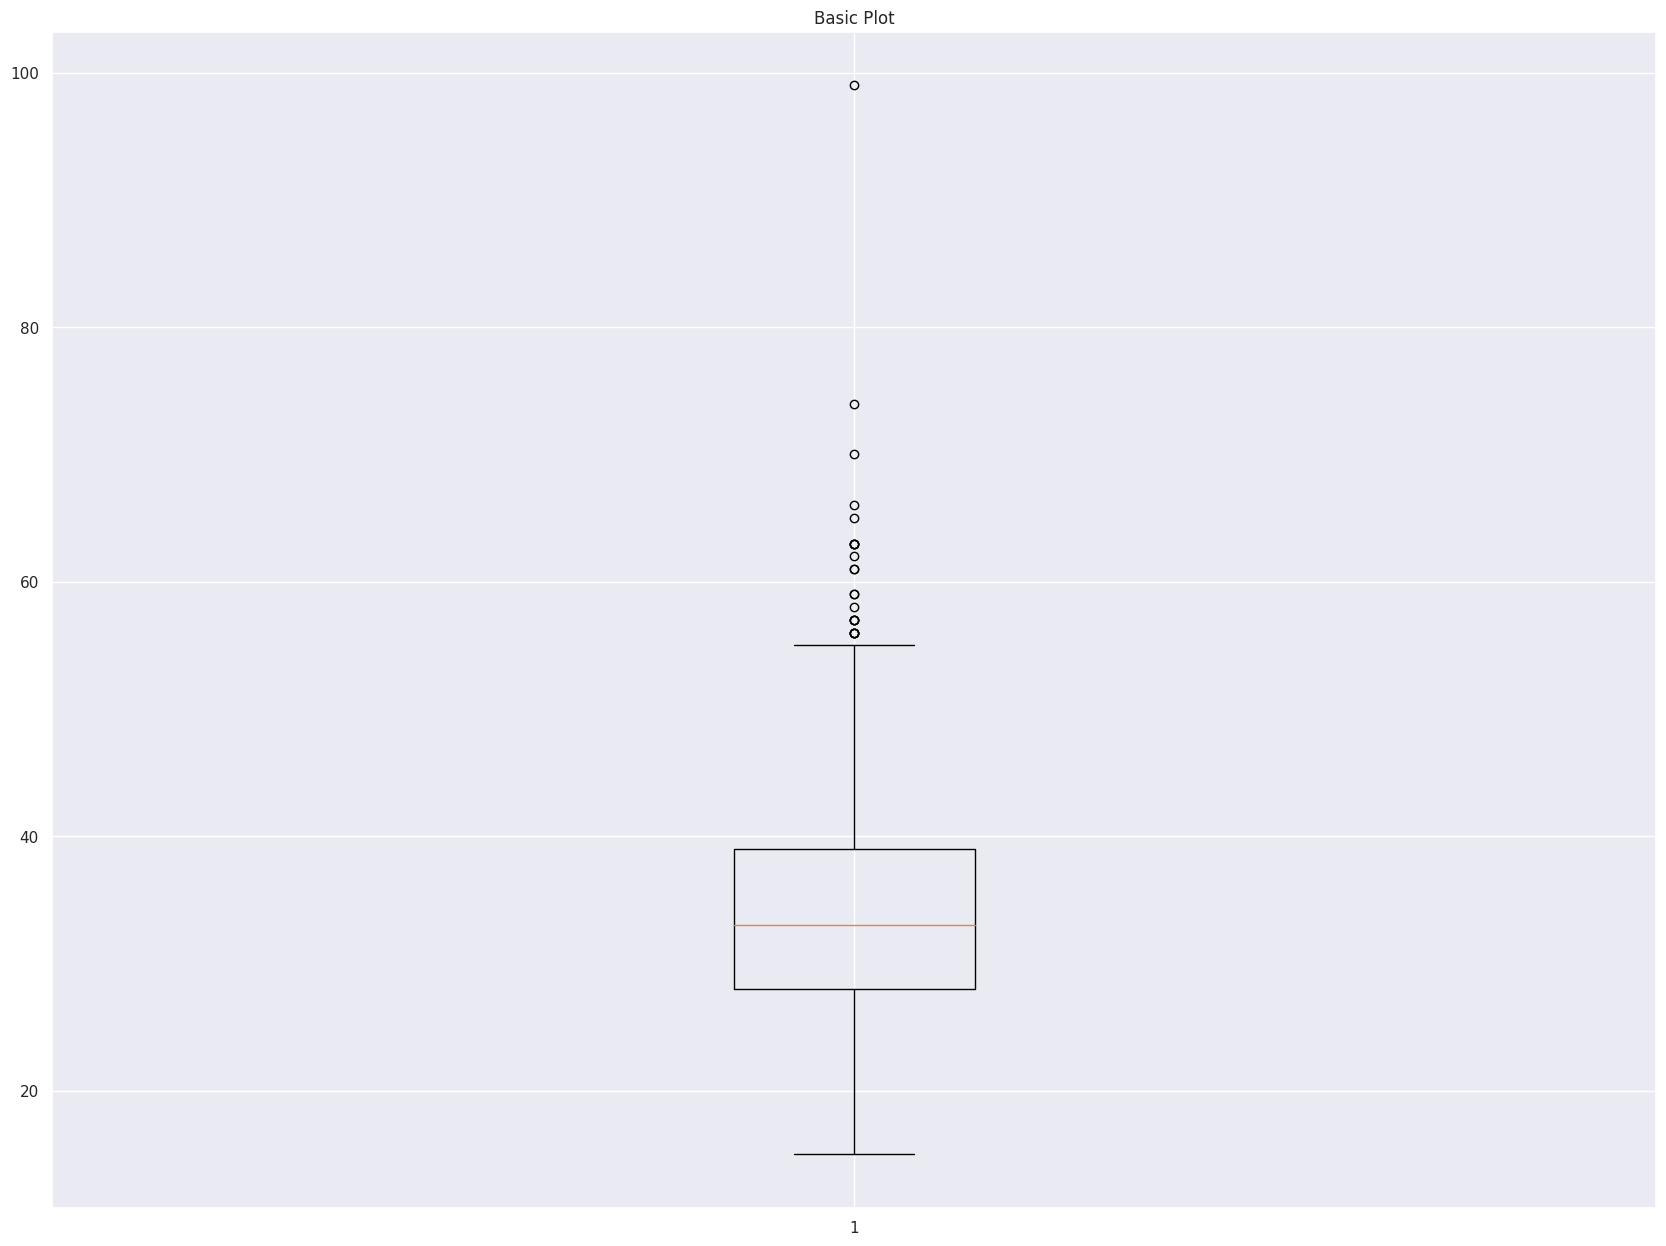

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_num[df_num['Age'] <= 100] ['Age']);
# In this basic plot we see that the average age lies around 30-35 years old. We also see that we have a person that is 100 years old and other person is like 2-3 years, which is also erroneus data.

#### **Looking for numerical features**

In [ ]:
# Check summary statistics for numerical features
df.describe()

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
count,1431.000000,1144.000000,263.000000,287.000000,1431.000000,1431.000000,1431.000000
mean,0.200559,0.770105,0.942966,0.644599,0.881901,0.585604,34.106219
std,0.400559,0.420949,0.232350,0.479471,0.322838,0.492790,8.285882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


 #### **Iteration through each column in the DataFrame**

In [ ]:
# Explore other columns and their unique values
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

self-employed: [0 1]
How many employees does your company or organization have?: ['26-100' 'Jun-25' nan 'More than 1000' '100-500' '500-1000' '01-May']
Is your employer primarily a tech company/organization?: [ 1. nan  0.]
Is your primary role within your company related to tech/IT?: [nan  1.  0.]
healthcare_coverage: ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
Do you know the options for mental health care available under your employer-provided coverage?: [nan 'Yes' 'I am not sure' 'No']
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: ['No' 'Yes' nan "I don't know"]
Does your employer offer resources to learn more about mental health concerns and options for seeking help?: ['No' 'Yes' nan "I don't know"]
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?: ["I don't know" 'Yes' nan 'No']

In [ ]:
# Check column names
print(df.columns)

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

**Computing the frequency of unique values in the column labeled 'self-employed' within the DataFrame**

In [ ]:
df['self-employed'].value_counts()

0    1144
1     287
Name: self-employed, dtype: int64

**Specifiying columns from the DataFrame that contain information related to mental health.**

In [ ]:
df.columns[['mental' in c for c in df.columns]]

Index(['Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
       'Do you feel that your employer takes

 **Filtering rows where the 'self-employed' column has a value of 0, and then computing the frequency of unique values in the column labeled**

In [ ]:
df.loc[df['self-employed'] == 0, 'Do you currently have a mental health disorder?'].value_counts()

Yes      451
No       440
Maybe    253
Name: Do you currently have a mental health disorder?, dtype: int64

##**Data Exploration**

**Count plot providing a visual representation of the distribution of responses to the question "Do you currently have a mental health disorder?"**

<Axes: xlabel='Do you currently have a mental health disorder?', ylabel='count'>

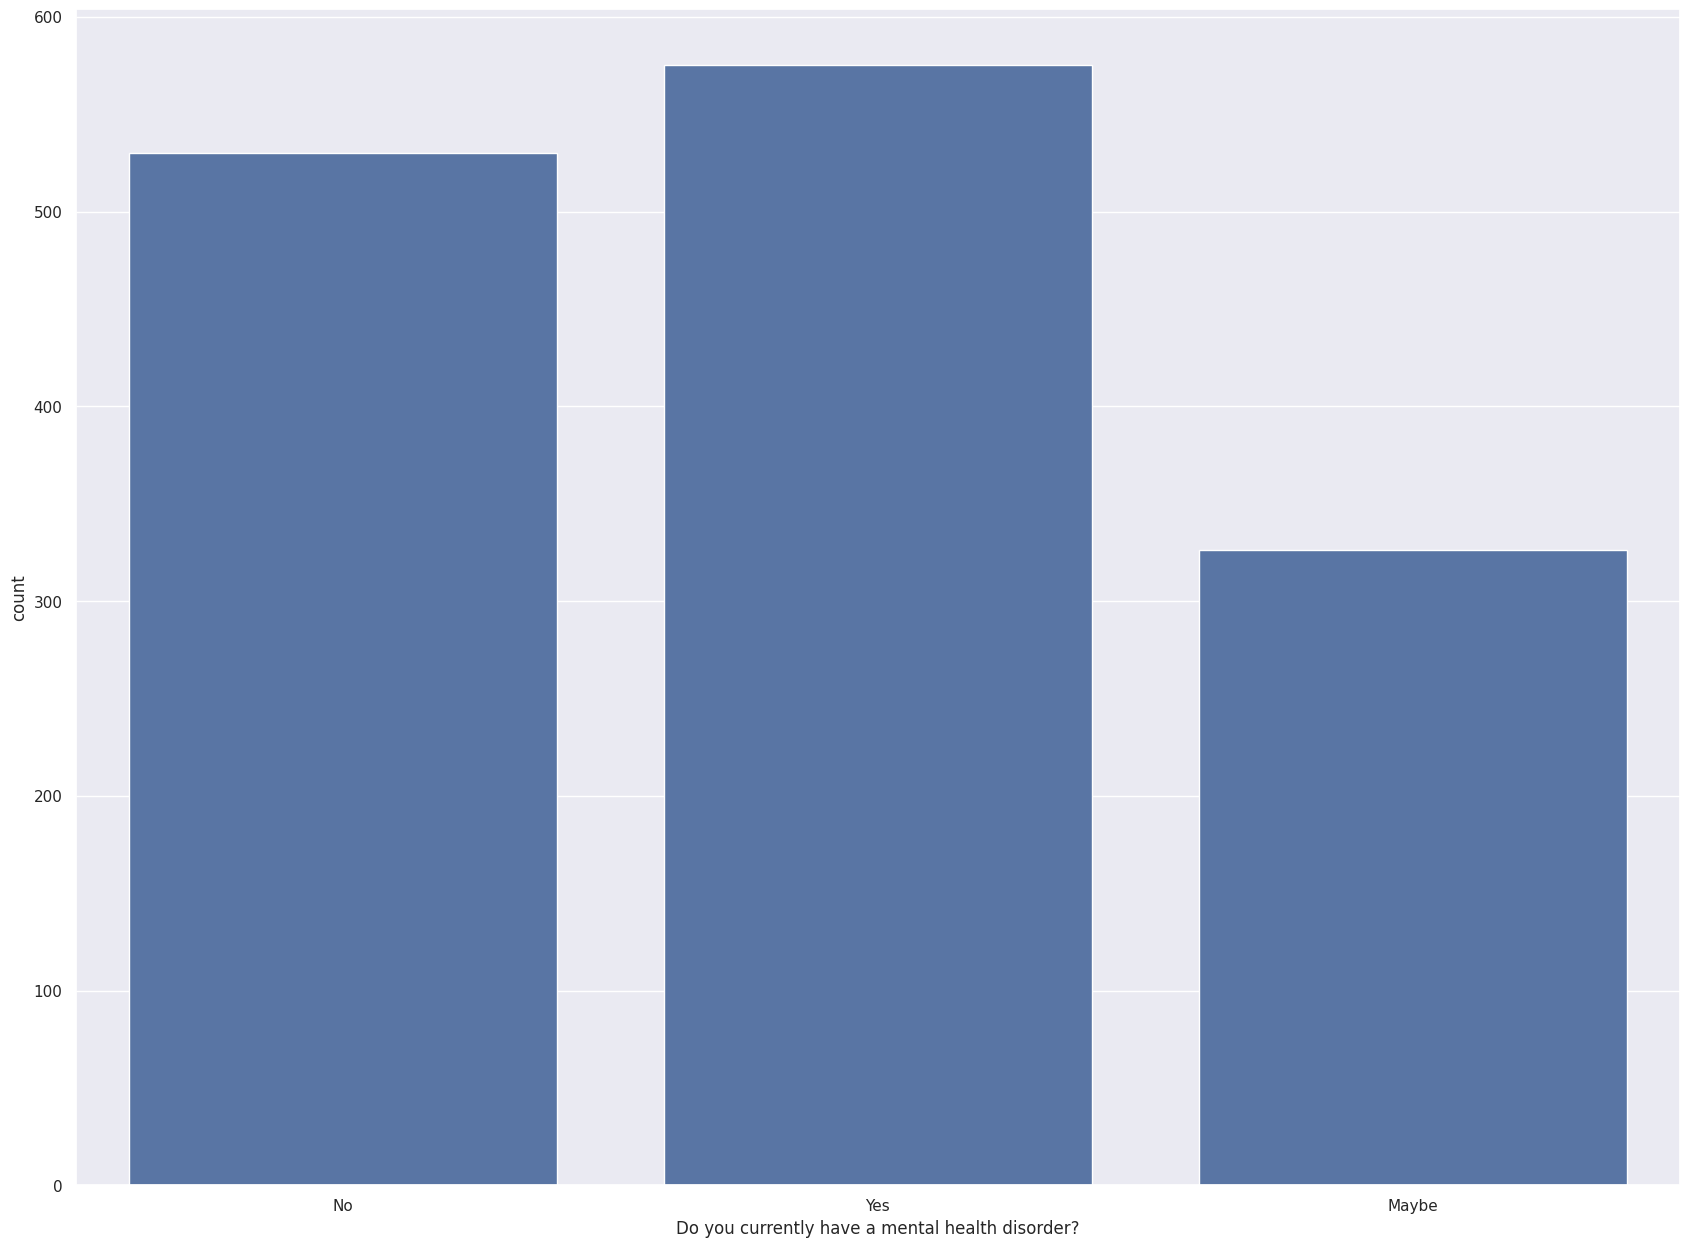

In [ ]:
sns.countplot(df, x = 'Do you currently have a mental health disorder?')

### **Visual representation of the relationship between self-employment status and the presence of a mental health disorder.**

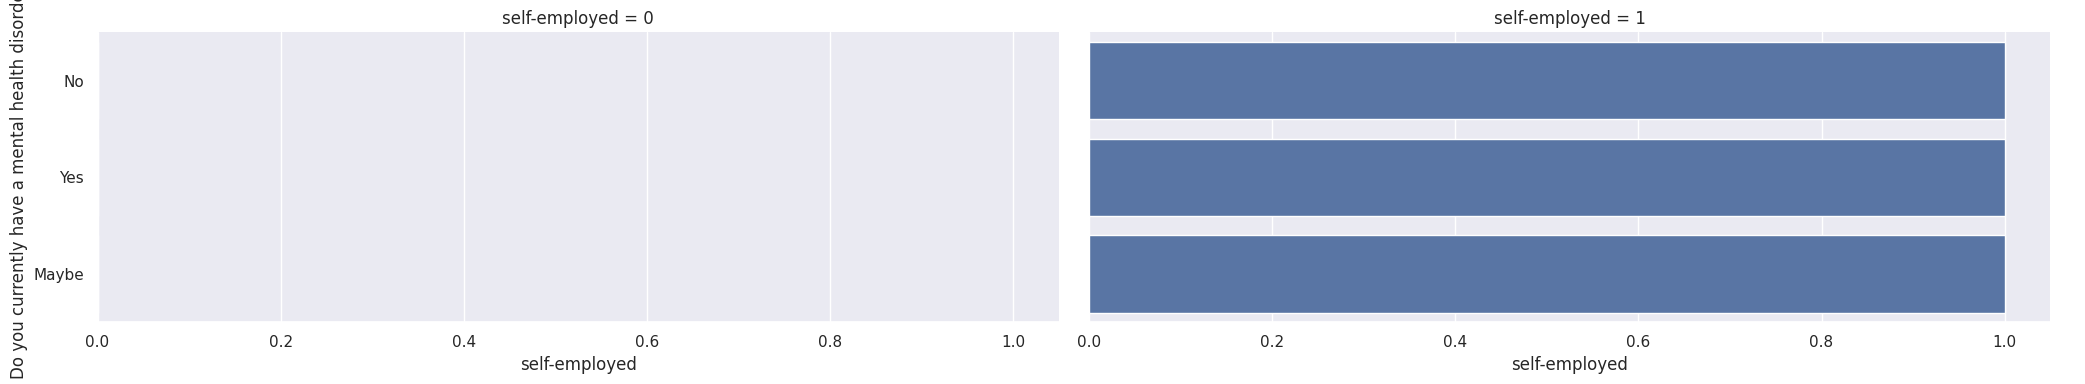

In [ ]:
sns.catplot(
    df, x="self-employed", y="Do you currently have a mental health disorder?", col = "self-employed",
    kind="bar", height=4, aspect=2.6,
)

**Creating a subset DataFrame containing only the columns 'self-employed' and 'Do you currently have a mental health disorder?'. Then, it replaces the numeric values in the 'self-employed' column with corresponding string labels 'Yes' and 'No'.**

In [ ]:
df_p1 = df[["self-employed", "Do you currently have a mental health disorder?"]]
df_p1.loc[df_p1['self-employed'] == 0, 'self-employed'] = 'No'
df_p1.loc[df_p1['self-employed'] == 1, 'self-employed'] = 'Yes'

df_p1.head(2)

,self-employed,Do you currently have a mental health disorder?
0,No,No
1,No,Yes


### **Code visualizing the relationship between the variables 'self-employed' and 'Do you currently have a mental health disorder?' using a grouped bar plot.**

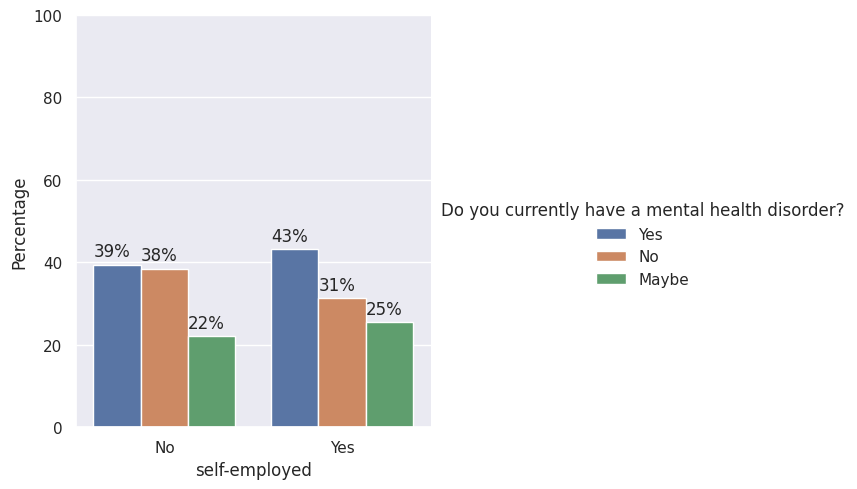

In [ ]:
#df1 = sns.load_dataset('titanic')
df1 = df_p1
df1.head()

x,y = 'self-employed', 'Do you currently have a mental health disorder?'

df1 = df1.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percentage').reset_index()

g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    height = p.get_height()
    height = round(height)

    if height > 0:
        txt = str(height) + '%'

        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y + 2,txt)
    else: None



In [ ]:
#sns.countplot(df, x="self-employed", hue="Do you currently have a mental health disorder?")


In [ ]:
df_p2 = df[['Do you currently have a mental health disorder?', 'What country do you work in?']]

#booleanDictionary = {'Yes': True, 'No': }


#df_p2['Do you currently have a mental health disorder?'] == 'Yes'
df_p2 = df_p2.groupby(['What country do you work in?', 'Do you currently have a mental health disorder?'])['What country do you work in?'].count()
df_p2 = df_p2.rename_axis(['country', 'mental_disorder']).reset_index()

country = []

for c in list(set(df_p2['country'])):
    disodrer  = df_p2.loc[(df_p2['country'] == c) & (df_p2['mental_disorder'] == 'Yes'), :].shape[0]
    #print(disodrer)
    total = df_p2.loc[df_p2['country'] == c,:].shape[0]
    #print(total)

    ratio = round((disodrer / total)*100)
    country.append((c, ratio, total))

df_ratio = pd.DataFrame(country, columns = ['country', 'mental disorder %', 'count'])
df_ratio.sort_values('mental disorder %', ascending = False)



,country,mental disorder %,count
26,Lithuania,100,1
1,United Arab Emirates,100,1
5,Ecuador,100,1
32,Bangladesh,100,1
20,Guatemala,100,1
2,Chile,50,2
29,Afghanistan,50,2
37,France,33,3
28,Canada,33,3
34,Sweden,33,3


In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [ ]:
i = list(df['What country do you work in?'].value_counts()[0:15].index)
v = list(df['What country do you work in?'].value_counts()[0:15].values)


country = []
for i, c in enumerate(i):
    m = df[df['What country do you work in?'] == c]['Do you currently have a mental health disorder?'].value_counts()['Yes']
    t = v[i]
    ratio = round((m / t ) * 100, 2)
    country.append((c, ratio, t))

df_p2 = pd.DataFrame(country, columns = ['country', 'mental %', 'total_responses'])
df_p2.loc[:, 'iso_alpha'] = ['USA', 'GBR', 'CAN', 'DEU', 'NLD', 'AUS', 'SWE',  'IRL', 'FRA', 'CHE', 'BRA', 'IND', 'RUS', 'NZL', 'DNK']
df_p2

,country,mental %,total_responses,iso_alpha
0,United States of America,46.82,850,USA
1,United Kingdom,34.97,183,GBR
2,Canada,30.14,73,CAN
3,Germany,18.97,58,DEU
4,Netherlands,44.68,47,NLD
5,Australia,47.06,34,AUS
6,Sweden,20.00,20,SWE
7,Ireland,40.00,15,IRL
8,France,21.43,14,FRA
9,Switzerland,30.00,10,CHE


In [ ]:
import plotly.express as px
import pandas as pd


# Import data from GitHub
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_with_codes.csv')


# Create basic choropleth map
fig = px.choropleth(df_p2, locations='iso_alpha', color='mental %', hover_name='country',
                    projection='equirectangular',
                    title='Mental Disorder % by Country - TOP 15 Countries')
fig.show()

#fig.savefig('plot.png', dpi = 100)

In [ ]:
import plotly.express as px
import pandas as pd


# Import data from GitHub
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_with_codes.csv')


# Create basic choropleth map
fig = px.choropleth(df_p2, locations='iso_alpha', color='mental %', hover_name='country',
                    projection='kavrayskiy7',
                    title='Mental Disorder % by Country - TOP 15 Countries')
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd


# Import data from GitHub
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_with_codes.csv')


# Create basic choropleth map
fig = px.choropleth(df_p2, locations='iso_alpha', color='mental %', hover_name='country',
                    projection='kavrayskiy7', scope = 'europe',
                    title='Mental Disorder % by Country - UK EU')
fig.show()

In [ ]:
df[df['What country do you work in?'] == 'United States of America']['Do you currently have a mental health disorder?'].value_counts()['Yes']

398

In [ ]:
398/(398 + 271 + 181)

0.4682352941176471

### **Visualization of the distribution of ages across different responses to the question about employer resources for mental health concerns, while also considering the current mental health disorder status.**

<Axes: xlabel='Does your employer offer resources to learn more about mental health concerns and options for seeking help?', ylabel='Age'>

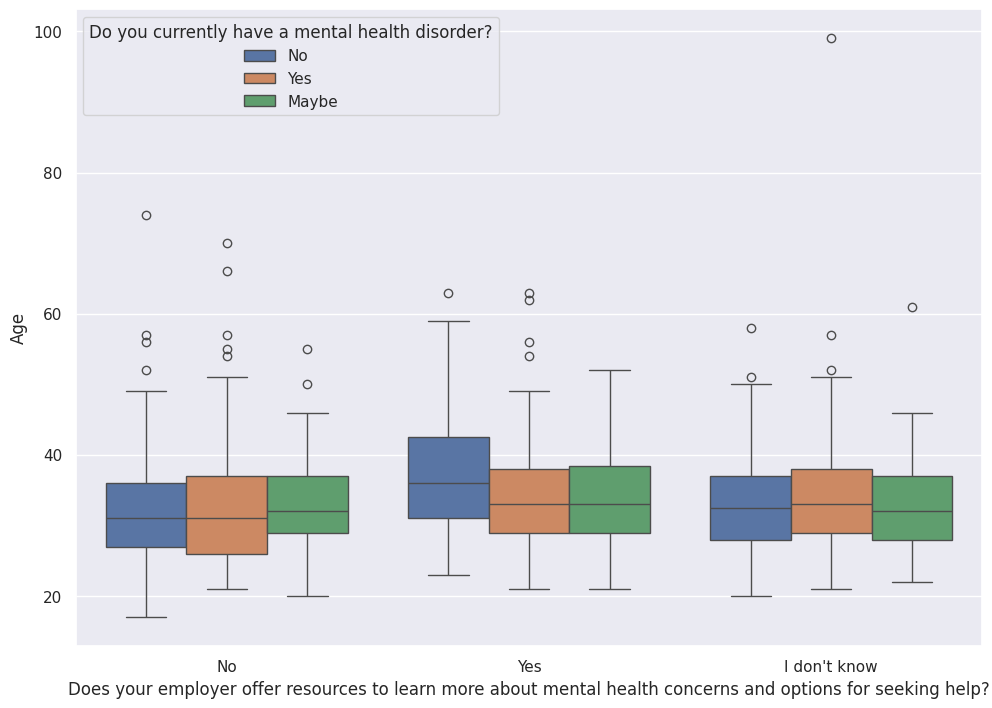

In [ ]:
import seaborn as sns

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

df_p2 = df[['Does your employer offer resources to learn more about mental health concerns and options for seeking help?','Age','Do you currently have a mental health disorder?', 'Is your employer primarily a tech company/organization?', 'Remote', 'Have you had a mental health disorder in the past?']]
df_p2

sns.boxplot(x='Does your employer offer resources to learn more about mental health concerns and options for seeking help?', y="Age", hue ='Do you currently have a mental health disorder?',
            data=df_p2)



### **Box plot illustrating the relationship between two variables: 'Have you had a mental health disorder in the past?' and 'Age' from the DataFrame.**

<Axes: xlabel='Have you had a mental health disorder in the past?', ylabel='Age'>

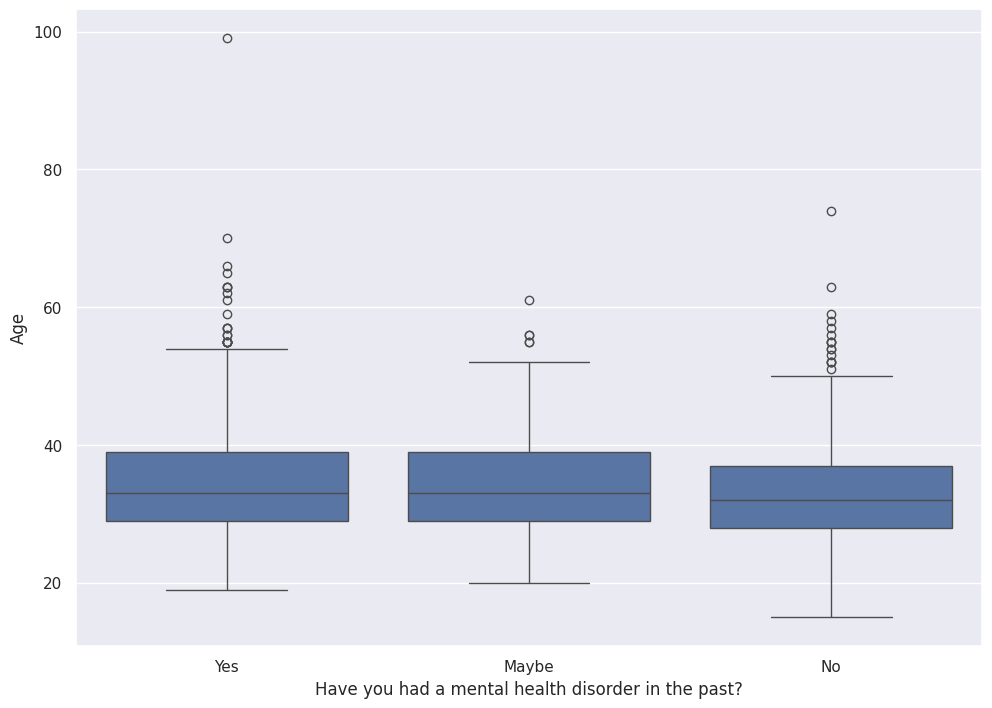

In [ ]:

sns.boxplot(x='Have you had a mental health disorder in the past?', y="Age",
            data=df_p2)

In [ ]:
df

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,M,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,M,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,M,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,M,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,M,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,M,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,M,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


### **Pie chart to represent the distribution of workers between self-employed and employed categories.**

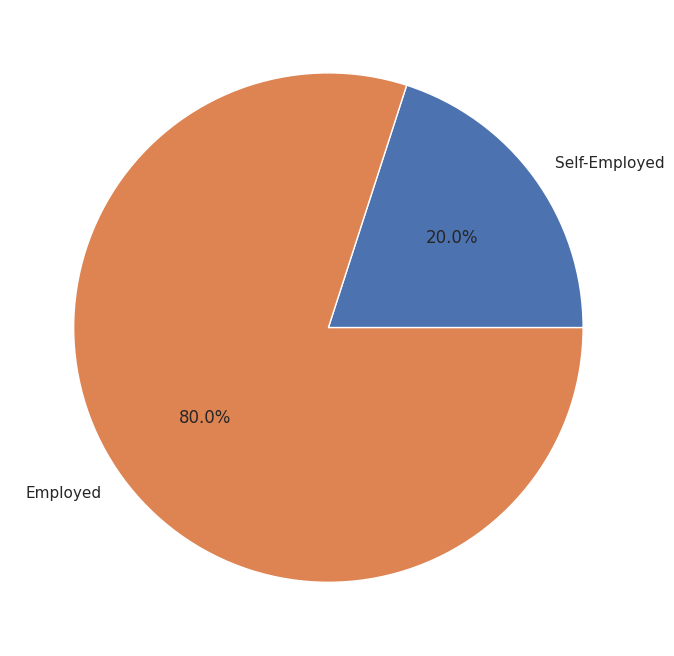

In [ ]:
labels = 'Self-Employed', 'Employed'
sizes = [287, 1146]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%');
# 80% of the workers are employed for a company, while 20% are self-employed.
# Shows us that most people still see working for a employer as a more reliable option.

In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

####  **Computing the frequency of each unique response in the column 'Do you know the options for mental health care available under your employer-provided coverage?' in the DataFrame.**

In [ ]:
df['Do you know the options for mental health care available under your employer-provided coverage?'].value_counts()

No               353
I am not sure    351
Yes              307
Name: Do you know the options for mental health care available under your employer-provided coverage?, dtype: int64

#### **Calculating the count of unique values in the column 'Is your employer primarily a tech company/organization?' within the DataFrame.**

In [ ]:
df_num['Is your employer primarily a tech company/organization?'].value_counts()

1.0    881
0.0    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

#### **Filtering the DataFrame to include only the rows where the column 'Is your employer primarily a tech company/organization?' equaling 1, indicating that the employer is primarily a tech company or organization.**

In [ ]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 1,'self-employed'].value_counts()

# There is no self-employed person working for tech

0    881
Name: self-employed, dtype: int64

#### **Filtering the DataFrame df_num based on the condition where the column 'Is your employer primarily a tech company/organization?' equals 0.**

In [ ]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 0, 'self-employed'].value_counts()

0    263
Name: self-employed, dtype: int64

In [ ]:
883 + 263

1146

#### **DataFrame df_num to include only the rows where the column 'self-employed' has a value of 1, indicating that the individuals are self-employed.**

In [ ]:
df_num[df_num['self-employed']== 1]

# Self employed people did not respond to Q:

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
3,1,NaN,NaN,1.0,1,1,43
9,1,NaN,NaN,1.0,1,1,30
18,1,NaN,NaN,1.0,0,1,25
24,1,NaN,NaN,1.0,1,0,38
33,1,NaN,NaN,0.0,1,0,37
...,...,...,...,...,...,...,...
1404,1,NaN,NaN,0.0,1,1,29
1408,1,NaN,NaN,1.0,1,0,34
1420,1,NaN,NaN,1.0,1,0,29
1428,1,NaN,NaN,1.0,1,1,34


In [ ]:
# 1. Check for all numeric data

# 2. Create a function to know which columns are object

# 3. Check for non-Numeric ( Strings / Object )

In [ ]:
df_num

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


In [ ]:
df.shape

(1431, 63)

In [ ]:
cols = df.columns

In [ ]:
df

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,M,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,M,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,M,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,M,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,M,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,M,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,M,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


#### **Counting the occurrences of each unique value in the 'US_state_work' column and resetting the index.**

In [ ]:
df_52 = df['US_state_work'].value_counts().reset_index()
df_52.head(2)

,index,US_state_work
0,California,141
1,Illinois,58


### **Creating a bar chart where the x-axis represents the states where workers are located (presumably the 'US_state_work' column), and the y-axis represents the count of workers in each state.**

In [ ]:
df_52.columns = ['US_state_work', 'count']

import plotly.express as px

fig = px.bar(df_52, x='US_state_work', y='count')
fig.show()
# This graphs shows the homestate of the interviewed workers, beeing Califronia clearly the state with the most people workers beeing interviewed, followed by Illinois, New York and Michigan.

In [ ]:
df_52.head(2)

,US_state_work,count
0,California,141
1,Illinois,58


 #### **Filtering the columns in the DataFrame df based on whether the substring 'mental' is present in each column name.**

In [ ]:
df.columns[['mental' in c for c in df.columns]]

Index(['Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
       'Do you feel that your employer takes

In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

#### **Calculation of the frequency of each unique value in the 'healthcare_coverage' column of the DataFrame.**

In [ ]:
df['healthcare_coverage'].value_counts()

Yes                                529
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: healthcare_coverage, dtype: int64

#### **Code filtering the DataFrame df to include only rows where the 'US_state_work' column contains values 'California', 'Illinois', or 'New York'. It then selects only the columns 'healthcare_coverage' and 'US_state_work' from the filtered DataFrame.**

In [ ]:
df_x = df.loc[df['US_state_work'].isin(['California', 'Illinois', 'New York']), ['healthcare_coverage', 'US_state_work']]

df_x.columns =['employer_provide_mh_benefits', 'state']
df_x

,employer_provide_mh_benefits,state
1,No,Illinois
4,Yes,Illinois
8,I don't know,California
19,I don't know,New York
20,No,New York
...,...,...
1399,Yes,California
1411,Yes,New York
1414,Yes,New York
1427,Yes,Illinois


In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

#### **Generation of a DataFrame by grouping the original DataFrame df by the US state where employees work and the type of healthcare coverage they have.**

In [ ]:
dfi =df.groupby('US_state_work')['healthcare_coverage'].value_counts().reset_index(name = 'count')
dfi

,US_state_work,healthcare_coverage,count
0,Alabama,Yes,3
1,Alabama,I don't know,1
2,Alaska,Yes,2
3,Arizona,No,2
4,Arizona,Yes,2
...,...,...,...
121,West Virginia,Yes,1
122,Wisconsin,Yes,6
123,Wisconsin,I don't know,1
124,Wisconsin,No,1


#### **Displaying the top 10 states with the highest percentage of employees having healthcare coverage provided by employers.**

In [ ]:
# state wise healthcare coverage by employer

#dfi = df.groupby('US_state_work')['healthcare_coverage'].value_counts().reset_index()
df1j = dfi.groupby('US_state_work')['count'].sum().reset_index()

dfi = dfi.loc[dfi['healthcare_coverage'] == 'Yes', :]

dfi = dfi.merge(df1j, on = 'US_state_work')

dfi['perct'] = round((dfi['count_x'] / dfi['count_y'])*100)
dfi = dfi.sort_values(by = 'perct', ascending= False)
dfi.head(10)

,US_state_work,healthcare_coverage,count_x,count_y,perct
10,Hawaii,Yes,1,1,100.0
43,West Virginia,Yes,1,1,100.0
27,New Mexico,Yes,1,1,100.0
23,Montana,Yes,1,1,100.0
1,Alaska,Yes,2,2,100.0
6,Delaware,Yes,1,1,100.0
16,Kentucky,Yes,2,2,100.0
22,Missouri,Yes,8,9,89.0
0,Alabama,Yes,3,4,75.0
20,Michigan,Yes,31,42,74.0


### **Using the Plotly library to create a bar chart.**

In [ ]:
fig = px.bar(dfi, x='US_state_work', y='perct')
fig.show()
# This graph shows the state wise health coverage by employer in percent, beeing the highest ones Hawaii, West Virginia, New Mexico, Montana, Alaska, etc. and being the lowest ones Vermont, Virginia and New Jersey.

### **Creating a boxplot visualization based on the values in the 'perct' column of the DataFrame dfi.**

{'whiskers': [<matplotlib.lines.Line2D at 0x7a248a518070>,
 'caps': [<matplotlib.lines.Line2D at 0x7a248a5185b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a248a4f7d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7a248a518af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a248a518d90>],
 'means': []}

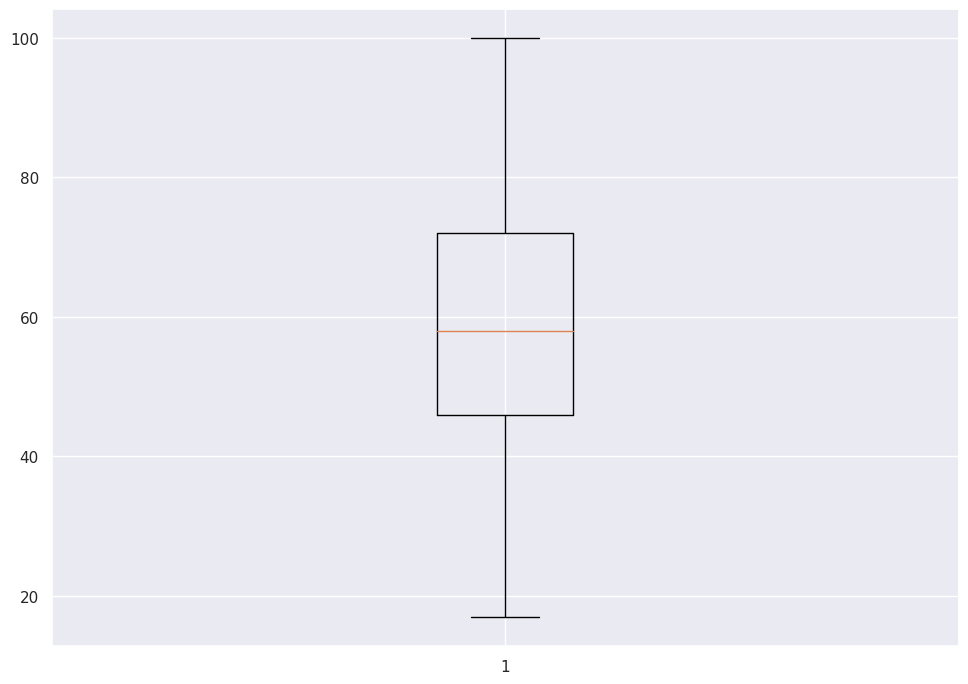

In [ ]:
plt.boxplot(dfi['perct'])

#### **Calculating the median of the values in the column named 'perct' in the DataFrame dfi**

In [ ]:
dfi['perct'].median()

58.0

#### **Reseting the index of the DataFrame dfi and dropping the existing index column.**

In [ ]:
dfi.reset_index(drop = True)

,US_state_work,healthcare_coverage,count_x,count_y,perct
0,Hawaii,Yes,1,1,100.0
1,West Virginia,Yes,1,1,100.0
2,New Mexico,Yes,1,1,100.0
3,Montana,Yes,1,1,100.0
4,Alaska,Yes,2,2,100.0
5,Delaware,Yes,1,1,100.0
6,Kentucky,Yes,2,2,100.0
7,Missouri,Yes,8,9,89.0
8,Alabama,Yes,3,4,75.0
9,Michigan,Yes,31,42,74.0


###  **Creating a choropleth map using Plotly Express, representing different US states and their respective healthcare coverage percentages.**

In [ ]:
import plotly.express as px

fig = px.choropleth(locations=["CA", "TX", "NY", "NM","HI","AK", "AL", "AR", "CO", "CT", "DE", "DC", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY",  "ME", "MD", "MA",
                               "MI", "MN", "MO", "MT", "NE", "NH", "NJ", "NC", "ND" ,"OH", "OK", "OR", "PA", "RI", "SD","TN", "UT", "VT","VA","WA","WV","WI", "NV", "WY", "LA", "MS", "SC", "AZ"], locationmode="USA-states", color=[70,58,58, 100, 100, 100, 40, 38, 33, 100, 50, 62, 45, 50, 54, 55, 60, 43, 100, 50, 73, 67, 74, 58, 89, 100, 60, 33, 17, 60, 33,
                                                                                                                                                                                                 70, 38, 48, 72, 50, 67, 61, 50, 33, 31, 58, 100, 67, 80, 58, 58, 58, 58, 58, 58], scope="usa")
fig.show()

# This US-Map assigns colors to every US state based on the percent of the healthcare coverage received, beeing yellow the color representing the highest and blue the one with the lowest. Directly related to the graph chart above.

### **Summarizying the counts of responses to the question "Do you currently have a mental health disorder?"**

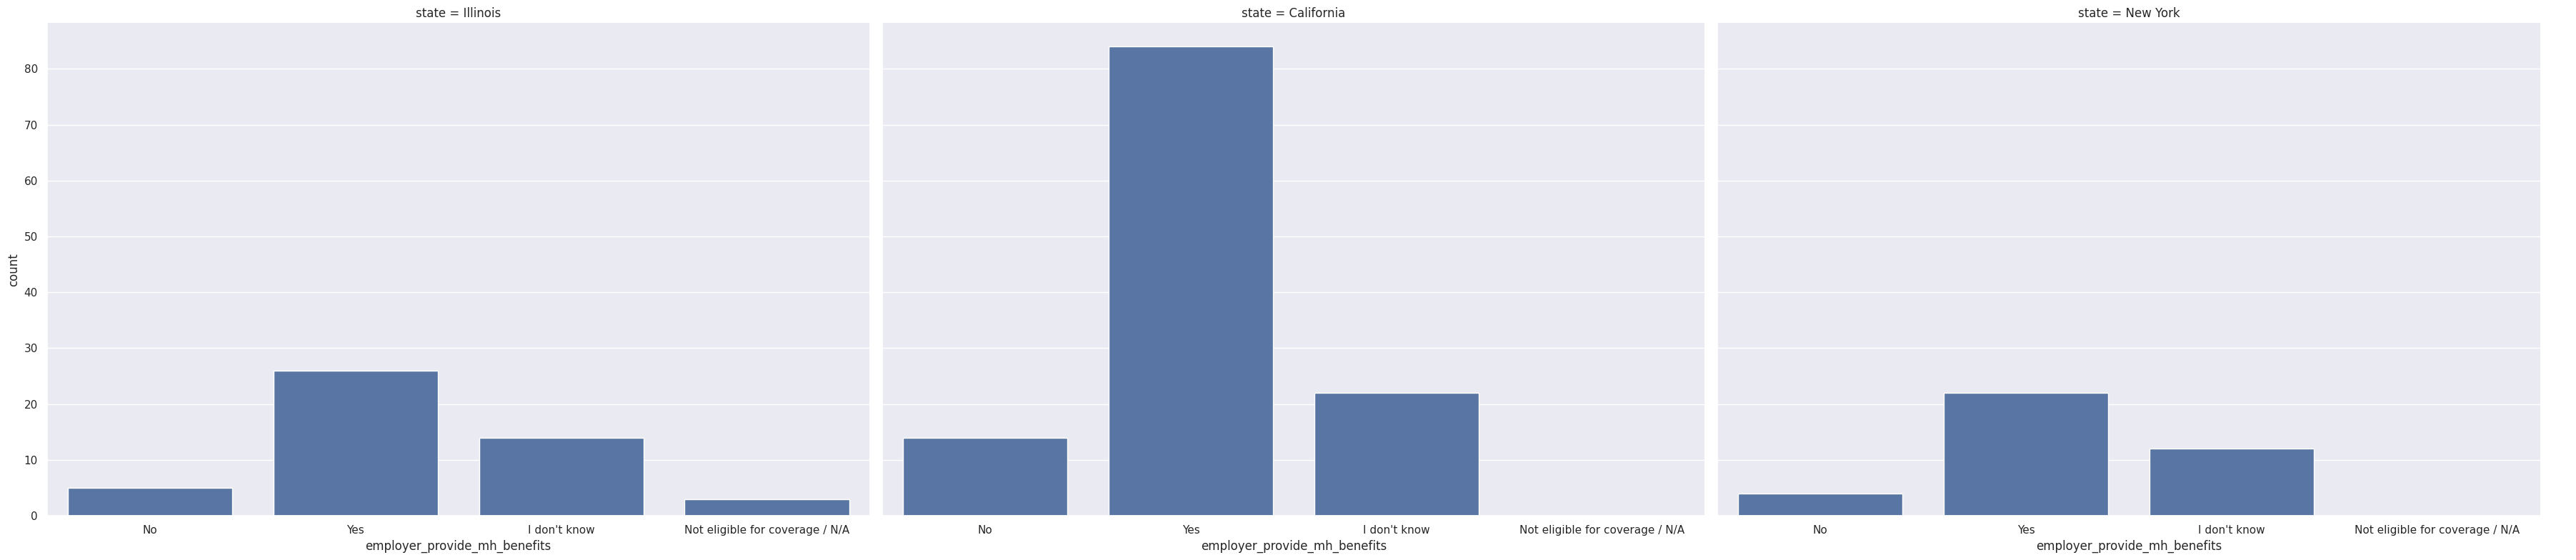

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20.7,15.27)})

sns.catplot(
    data=df_x, x="employer_provide_mh_benefits", col="state",
    kind="count", height=8, aspect=1.5,
)
# The following graphs show if mental health benefits are provided by the employers, in Illinois, California and New York respectively.

**Do you currently have a mental health disorder?**

In [ ]:
df.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

#### **Summarizying the counts of responses to the question "Do you currently have a mental health disorder?"**

In [ ]:
df_48 = df['Do you currently have a mental health disorder?'].value_counts().reset_index()

df_48.columns = ['Answer', 'Count_Mental_Disorder']

### **Generating a pie chart using Plotly Express (px.pie) to visualize the distribution of responses to the question "Do you have Mental Disorder?" The responses are categorized into 'yes', 'no', and 'maybe'.**

In [ ]:
fig = px.pie(df_48, values='Count_Mental_Disorder', names='Answer', title='Do you have Mental Disorder ?')
fig.show()
# Pie showing porcentages of people having mental disorders. Answers are yes, no and maybe.

 Separating columns in the DataFrame df1  indicating the presence of various mental health conditions based on the column "If yes, what condition(s) have you been diagnosed with?". Each new column corresponds to a specific mental health condition.

In [ ]:
df1 = df.copy()

#Create separate columns for presence of each MHC for easier filter
df1['Anxiety Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')
df1['Mood Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Mood Disorder')
df1['ADHD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')
df1['OCD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')
df1['PTSD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')
df1['PTSD undiagnosed'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('PTSD \(undiagnosed\)')
df1['Eating Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Eating')
df1['Substance Use Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Substance')
df1['Stress Response Syndrome'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Stress Response')
df1['Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Personality Disorder')
df1['Pervasive Developmental Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Pervasive')
df1['Psychotic Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Psychotic')
df1['Addictive Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Addictive Disorder')
df1['Dissociative Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Dissociative')
df1['Seasonal Affective Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Seasonal')
df1['Schizotypal Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Schizotypal')
df1['Traumatic Brain Injury'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Brain')
df1['Sexual Addiction'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Sexual')
df1['Autism'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Autism')
df1['ADD w/o Hyperactivity)'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('ADD \(w/o Hyperactivity\)')



#### **Selecting the columns 'Anxiety Disorder' and 'Mood Disorder' from the DataFrame df1**

In [ ]:
df1[['Anxiety Disorder', 'Mood Disorder' ]]

,Anxiety Disorder,Mood Disorder
0,NaN,NaN
1,True,True
2,NaN,NaN
3,True,True
4,True,False
...,...,...
1428,NaN,NaN
1429,NaN,NaN
1430,NaN,NaN
1431,True,True


#### **Counting of values in the 'Sexual Addiction' column within the DataFrame df1**

In [ ]:
df1['Sexual Addiction'].value_counts()

False    567
True       1
Name: Sexual Addiction, dtype: int64

#### **Creating four DataFrames based on different mental health conditions present in the workplace population**

In [ ]:
#create dfs to 4 population types, no mental conditions, at least both anxiety & depression,
#at least ADHD, and at least OCD
df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]

In [ ]:
df_anx_dep

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,Pervasive Developmental Disorder,Psychotic Disorder,Addictive Disorder,Dissociative Disorder,Seasonal Affective Disorder,Schizotypal Personality Disorder,Traumatic Brain Injury,Sexual Addiction,Autism,ADD w/o Hyperactivity)
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
16,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,No,I don't know,Very difficult,...,False,False,False,False,False,False,False,False,False,False
19,0,100-500,0.0,1.0,I don't know,No,No,No,I don't know,I don't know,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,0,100-500,0.0,1.0,Yes,Yes,No,I don't know,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False
1415,0,More than 1000,0.0,1.0,Not eligible for coverage / N/A,I am not sure,No,I don't know,I don't know,Very difficult,...,False,False,False,False,False,False,False,False,False,False
1427,0,500-1000,1.0,NaN,Yes,No,No,No,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,False,False,False,False,False,False,False,False,False,False


#### **Calculation of the population size of each group based on their mental health conditions in the workplace.**

In [ ]:
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]

In [ ]:
#Display population size of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD', 'PTSD', 'OCD']
df_group_values = [len(df1), len(df_no_MHD), len(df_anx_dep),
                   len(df_adhd), len(df_ptsd), len(df_ocd)]

df_MHD_count = pd.DataFrame(columns = ['Population', 'Count'])
df_MHD_count['Population'] = df_group
df_MHD_count['Count'] = df_group_values
df_p3 = df_MHD_count.iloc[2:,:].copy()
df_p3.columns = ['Disorder', 'Count']
fig = px.bar(df_p3, x='Disorder', y='Count', color =  'Disorder')
fig.show()

In [ ]:
df_p3

,Disorder,Count
2,Anxiety & Depression,253
3,ADHD,121
4,PTSD,69
5,OCD,45


In [ ]:
lab = list(df_p3['Disorder'])

In [ ]:
val = list(df_p3['Count'])
val


[253, 121, 69, 45]

In [ ]:
df['Gender'].value_counts()

M    1346
F      85
Name: Gender, dtype: int64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([go.Pie(labels=lab, values=val, hole=.5)])
fig.show()

In [ ]:
df_adhd['Gender'].value_counts()

M    108
F     13
Name: Gender, dtype: int64

In [ ]:
df_ocd['Gender'].value_counts()

M    41
F     4
Name: Gender, dtype: int64

In [ ]:
df_ptsd['Gender'].value_counts()

M    61
F     8
Name: Gender, dtype: int64

In [ ]:
df.loc[df['Do you currently have a mental health disorder?'] == 'No']['Gender'].value_counts()

M    510
F     20
Name: Gender, dtype: int64

In [ ]:
m_count = df['Gender'].value_counts()['M']
f_count = df['Gender'].value_counts()['F']
print(m_count, f_count)

m_nodisorder = 510
f_nodisorder = 20

1346 85


In [ ]:
from plotly.subplots import make_subplots

specs = [[{'type':'pie'}, {"type": "pie"}]]
fig = make_subplots(rows=1, cols=2, specs=specs, shared_yaxes = True, subplot_titles=['Male', 'Female'])


fig.add_trace(go.Pie(
                            labels = ['No Disorder', 'Anxiety & Depression', 'ADHD', 'PTSD', 'OCD'],
                            values = [m_nodisorder, 230, 108, 61 , 41],
                            hole = 0,
                            marker_colors = ['#088F8F', '#353837','#646665', '#8e9492', '#c9d1ce' ],
                            textinfo='label+text+percent',
                            showlegend = True,

                            ## ADD - display both
                            ), 1, 1)


fig.add_trace(go.Pie(
                            labels = ['No Disorder', 'Anxiety & Depression', 'ADHD', 'PTSD', 'OCD'],
                            values = [f_nodisorder, 23, 13, 8 , 4],
                            hole = 0,
                            marker_colors = ['#088F8F', '#353837','#646665', '#8e9492', '#c9d1ce'],
                            textinfo='label+text+percent',
                            showlegend = True,

                            ## ADD - display both
                            ), 1, 2)

fig.update_layout(showlegend=True,
                  title=dict(text="Male vs Female : Mental Disorders",
                             font=dict(
                                        family="Arial",
                                        size=14,
                                        color='#283747')
                    ))

In [ ]:
from plotly.subplots import make_subplots

specs = [[{'type':'pie'}, {"type": "bar"}]]
fig = make_subplots(rows=1, cols=2, specs=specs, shared_yaxes = True, subplot_titles=['Top Mental Disorders by %', 'Male vs Female Participation %'])

##My data creation##
df_pie=pd.DataFrame({'index':['Anxiety & Depression','ADHD','PTSD','OCD'], 'count':[253,121,69,45]})
df_bar=pd.DataFrame({'Disorder': ['Anxiety & Depression', 'Anxiety & Depression', 'ADHD', 'ADHD', 'PTSD', 'PTSD', 'OCD', 'OCD'], \
                     'count': [230, 23, 108, 13, 61, 8, 41, 4], \
                     'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']})

fig.add_trace(go.Pie(
                            labels = df_pie['index'],
                            values = df_pie['count'],
                            hole = 0.6,
                            marker_colors = ['#353837','#646665', '#8e9492', '#c9d1ce'],
                            textinfo='label+text+percent',
                            showlegend = True,

                            ## ADD - display both
                            ), 1, 1)


df_bar = df_bar.sort_values(by = 'Disorder' )
## New column to get percentage of row across all Male/Females
#df_bar['percentage'] = df_bar.groupby(['Gender'])['count'].transform(lambda z: round(z / z.sum() * 100))


df_bar['percentage'] = list(round((df_bar.groupby(['Disorder', 'Gender'])['count'].sum() /  df_bar.groupby(['Disorder'])['count'].sum())*100, 1))

## New column - text of count and percentage - how you need the annotation shown
#df_bar['Text']=df_bar['count'].astype(str) + ',' + df_bar['percentage'].astype(str)+'%'

df_bar['Text']=  df_bar['percentage'].astype(str)+'%'
## Create individual traces for Male and Female
trace1 = go.Bar(
    x=df_bar[df_bar.Gender == 'Male']['Disorder'],
    y=df_bar[df_bar.Gender == 'Male']['count'],
    name='Male',
    text=df_bar[df_bar.Gender == 'Female']['Text'], ## Display text
    textposition='auto',
)

trace2 = go.Bar(
    x=df_bar[df_bar.Gender == 'Female']['Disorder'],
    y=df_bar[df_bar.Gender == 'Female']['count'],
    name='Female',
    text=df_bar[df_bar.Gender == 'Male']['Text'], ## Display text
    textposition='auto'
)

fig.append_trace(trace1, 1,2) ## Add as first set of bars in second subplot
fig.append_trace(trace2,1,2) ## Add as second set of bars in second subplot

##Removed your original code
#fig.add_trace(go.Bar(
#                        x = df_bar['Satisfaction'],
#                        y = df_bar['count'],
#                        base  =df_bar['Gender'],
#                        ),1,2)

fig.update_layout(showlegend=True,
                  title=dict(text="Main Categories of Mental Disorder",
                             font=dict(
                                        family="Arial",
                                        size=14,
                                        color='#283747')
                    ))

fig.show()

### **Calculating and visualizing the proportions of different population groups based on their mental health conditions in the workplace.**

Text(2, 1.15, 'Common MHCs in the Tech Workplace')

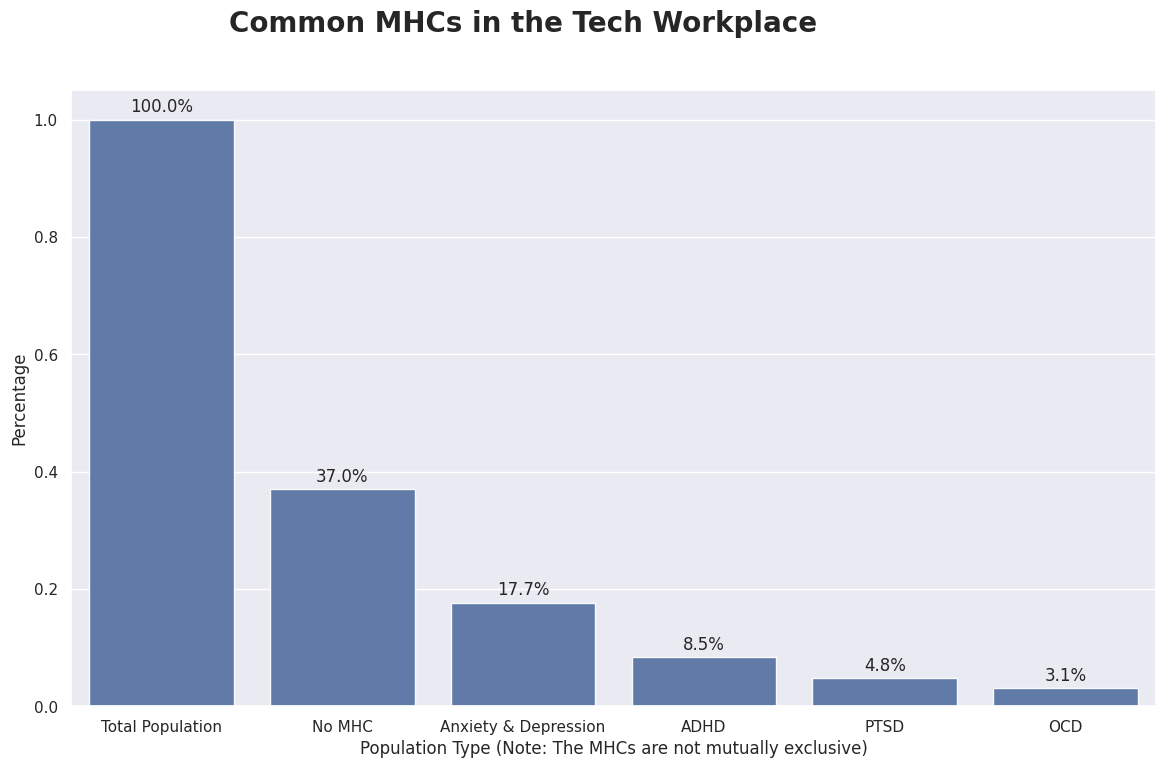

In [ ]:
#Display proportions of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD','PTSD', 'OCD']
df_group_values = [len(df1)/len(df1), len(df_no_MHD)/len(df1), len(df_anx_dep)/len(df1),
                   len(df_adhd)/len(df1),len(df_ptsd)/len(df1), len(df_ocd)/len(df1)]

#bar plot creation
sns.set(style="darkgrid")
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x = df_group, y = df_group_values,alpha =.95)
ax1.set(xlabel = 'Population Type (Note: The MHCs are not mutually exclusive)')
ax1.set(ylabel = 'Percentage')

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.text(2, 1.15, 'Common MHCs in the Tech Workplace',weight='bold',
         horizontalalignment='center',fontsize=20)
# Graph chart showing percentages of mental health disorders at the workplace, beeing the most predominant one anxiety and depression.

###  **Accessing the 'Remote' column in the DataFrame.**

In [ ]:
df['Remote']

0       Sometimes
1           Never
2          Always
3       Sometimes
4       Sometimes
          ...    
1428    Sometimes
1429    Sometimes
1430    Sometimes
1431    Sometimes
1432    Sometimes
Name: Remote, Length: 1431, dtype: object

In [ ]:

df1 = df1.rename(columns={'What is your gender?': 'Gender',
                        'What is your age?': 'Age',
                        'What country do you live in?': 'Country',
                        'What US state or territory do you live in?': 'US_state_live',
                        'Do you work remotely?': 'Remote',
                        'What US state or territory do you work in?': 'US_state_work',
                        'Which of the following best describes your work position?' : 'work_pos',
                        'Have you been diagnosed with a mental health condition by a medical professional?' : 'Diagnosed_mhc_by_medical_professional',
                        'Are you self-employed?' : 'self-employed',
                        "Does your employer provide mental health benefits as part of healthcare coverage?" : "healthcare_coverage"
                        })

###  **Counting the occurrences of each unique value in the 'Gender' column of the DataFrame df1**

In [ ]:
df1['Gender'].value_counts().reset_index()

,index,Gender
0,M,1346
1,F,85


### **Preprocessing and filtering data related to mental health disorders.**

In [ ]:
# Top MHC Disorders

import re

def retun_clean_data(str1):
    try:
        clean = re.sub('[^a-zA-Z0-9]', '', str1)

    except:
        clean = str1

    return clean


df1['Gender'] = df1['Gender'].apply(lambda x: retun_clean_data(x))



df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]


### **Counting the occurrences of each unique value in the 'Gender' column of the DataFrame**

In [ ]:
#df_no_MHD['Gender'] = df_no_MHD['Gender'].str.strip()
df_no_MHD['Gender'].value_counts()

M    510
F     20
Name: Gender, dtype: int64

###  **Standardizing the entries in the 'Gender' column of the DataFrame df1. It categorizes them as either 'M' for male or 'F' for female based on certain patterns present in the string values.**

In [ ]:
df1.loc[df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude', na = False), 'Gender'] = 'M'
df1.loc[~df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude', na = False), 'Gender'] = 'F'

**Standardizing the entries in the 'Gender' column of the DataFrame df_no_MHD. It categorizes them as either 'M' for male or 'F' for female based on certain patterns present in the string values.**

In [ ]:
df_no_MHD.loc[df_no_MHD['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude'), 'Gender'] = 'M'
df_no_MHD.loc[~df_no_MHD['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude'), 'Gender'] = 'F'

###  **Counting of each unique gender category present in the 'Gender' column of the DataFrame df1**

In [ ]:
df1['Gender'].value_counts()

M    1346
F      85
Name: Gender, dtype: int64

### **Summarizing the distribution of categorical variables like gender**

In [ ]:
df1['Gender'].value_counts().reset_index()

,index,Gender
0,M,1346
1,F,85


### **Calculation of the percentage of males and females without Mental Health Conditions (MHC) in the DataFrame.**

In [ ]:
df2j = df_no_MHD['Gender'].value_counts().reset_index()
df2j['total'] = list(df1['Gender'].value_counts())
df2j['perct'] = round((df2j['Gender']/ df2j['total'])*100)
df2j

,index,Gender,total,perct
0,M,510,1346,38.0
1,F,20,85,24.0


### **Generation of a pie chart using Plotly Express (px) to represent the percentage of males and females without Mental Health Conditions (MHC) in the DataFrame df2j**

In [ ]:

fig = px.pie(df2j, values='perct', names='index', title='Male and Female proportion without MHC')
fig.show()
# Pie representing the percentage of males and females witohut MHC. We can see that females have around almost double amount of MHCs. (half amount of no MHCs)

### **Inspection of the distribution of gender categories in the DataFrame df1**

In [ ]:
df1['Gender'].value_counts().reset_index().head(30)

,index,Gender
0,M,1346
1,F,85


###  **Standardizing the gender entries in the DataFrame df1 by categorizing them into 'M' for male and 'F' for female.**

In [ ]:
df1.loc[df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude',  na=False), 'Gender'] = 'M'
df1.loc[~df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude',  na=False), 'Gender'] = 'F'

In [ ]:
df1.columns

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'healthcare_coverage',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

###  **Organizying the data by grouping responses based on gender and mental health disorder status, and then extracts information specifically related to female respondents.**

In [ ]:
# Group by - this helps to group based on your criteria - this case Gender and MHC
df_mhc = df1.groupby(['Gender', 'Do you currently have a mental health disorder?'])['self-employed'].count().reset_index()
df_mhc['G_D'] = df_mhc['Gender'] + '_' +  df_mhc['Do you currently have a mental health disorder?']
df_mhc.loc[df_mhc['G_D'].str.startswith('F'), :]

,Gender,Do you currently have a mental health disorder?,self-employed,G_D
0,F,Maybe,17,F_Maybe
1,F,No,20,F_No
2,F,Yes,48,F_Yes


### **Creation of a pie chart representing responses to the question "Do you currently have a mental health disorder?" specifically for females.**

In [ ]:
fig = px.pie(df_mhc.loc[df_mhc['G_D'].str.startswith('F'), :], values='self-employed', names='G_D')
fig.show()
# Pie answering the question: "Do you currently have a mental health disorder?", asked to females. A little bit more of the half of the asked females are they have at least one, while 23.5% are not sure and 20% dont know.

### **Creation of a pie chart representing responses to the question "Do you currently have a mental disorder?" specifically for males.**

In [ ]:
fig = px.pie(df_mhc.loc[df_mhc['G_D'].str.startswith('M'), :], values='self-employed', names='G_D')
fig.show()
# Pie answering the question: "Do you currently have a mental disorder?, asked to males. More or less the same quantity say the have and dont have mental disorders. 23% are not sure about it."

### **Creation of a pie chart illustrating the combined distribution of responses to the question "Do you have Mental Disorder?" among different categories.**

In [ ]:
fig = px.pie(df_48, values='Count_Mental_Disorder', names='Answer', title='Do you have Mental Disorder ?')
fig.show()
# Same as previous 2 pies , but combining both female and male answers. The "yes" is predominant with 40,1%, while the "no" is not far behind, with 37.1%.

In [ ]:
# Gender + Diseases

df_adhd

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,Pervasive Developmental Disorder,Psychotic Disorder,Addictive Disorder,Dissociative Disorder,Seasonal Affective Disorder,Schizotypal Personality Disorder,Traumatic Brain Injury,Sexual Addiction,Autism,ADD w/o Hyperactivity)
18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
49,0,Jun-25,1.0,NaN,Yes,Yes,No,No,Yes,Very easy,...,False,False,False,False,False,False,False,False,False,False
53,0,More than 1000,1.0,NaN,Yes,Yes,No,Yes,I don't know,Somewhat difficult,...,False,False,False,False,False,False,False,False,False,False
67,0,More than 1000,1.0,NaN,Yes,I am not sure,Yes,Yes,I don't know,Neither easy nor difficult,...,False,False,False,False,False,False,False,False,False,False
89,0,26-100,1.0,NaN,I don't know,I am not sure,Yes,Yes,Yes,Very easy,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1402,0,26-100,1.0,NaN,No,Yes,Yes,No,No,I don't know,...,False,False,False,True,False,False,False,False,False,False
1415,0,More than 1000,0.0,1.0,Not eligible for coverage / N/A,I am not sure,No,I don't know,I don't know,Very difficult,...,False,False,False,False,False,False,False,False,False,False
1419,0,More than 1000,1.0,NaN,Yes,Yes,Yes,Yes,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False


### **Computing the frequency count of unique values in the 'Gender' column of the DataFrame.**

In [ ]:
df1['Gender'].value_counts()

M    1346
F      85
Name: Gender, dtype: int64

### **Analyzing data related to Attention Deficit Hyperactivity Disorder (ADHD) among different genders.**

In [ ]:
df_male_adhd = df1.loc[(df1["ADHD"]==1) & (df1["Gender"]=="M")]
df_female_adhd = df1.loc[(df1["ADHD"]==1) & (df1["Gender"]=="F")]

df_gender_adhd = pd.DataFrame (columns = ["gender", "count"])
df_gender_adhd["gender"] = ['Male', "Female"]
df_gender_adhd["count"] = [len(df_male_adhd),len(df_female_adhd)]
df_gender_adhd

df_gender_adhd['total'] = list(df1['Gender'].value_counts())
df_gender_adhd['perct'] = round((df_gender_adhd['count'] / df_gender_adhd['total'])*100)
df_gender_adhd

,gender,count,total,perct
0,Male,108,1346,8.0
1,Female,13,85,15.0


### **Generation of a pie chart illustrating the percentage distribution of Attention Deficit Hyperactivity Disorder (ADHD) cases among different genders.**

In [ ]:
fig = px.pie(df_gender_adhd, values='perct', names='gender', title="ADHD for both genders")
fig.show()
# Pie showing percentage of males and females with ADHD. Females having bewtween 2/4 and 3/4 of all cases.

### Analying of data related to Obsessive-Compulsive Disorder (OCD) among different genders.

In [ ]:
df_male_ocd = df1.loc[(df1["OCD"]==1) & (df1["Gender"]=="M")]
df_female_ocd = df1.loc[(df1["OCD"]==1) & (df1["Gender"]=="F")]

df_gender_ocd = pd.DataFrame (columns = ["gender", "count"])
df_gender_ocd["gender"] = ['Male', "Female"]
df_gender_ocd["count"] = [len(df_male_ocd),len(df_female_ocd)]
df_gender_ocd

df_gender_ocd['total'] = list(df1['Gender'].value_counts())
df_gender_ocd['perct'] = round((df_gender_ocd['count'] / df_gender_ocd['total'])*100)
df_gender_ocd

,gender,count,total,perct
0,Male,41,1346,3.0
1,Female,4,85,5.0


### Pie chart illustrating the percentage distribution of Obsessive-Compulsive Disorder (OCD) cases among different genders.

In [ ]:
fig = px.pie(df_gender_ocd, values='perct', names='gender', title="OCD for both genders")
fig.show()
# Pie showing percentage of males and females with OCD. Females again having between 2/4 and 3/4 of all cases.

**Analazying of data related to Post-Traumatic Stress Disorder (PTSD) among different genders.**

In [ ]:
df_male_ptsd = df1.loc[(df1["PTSD"]==1) & (df1["Gender"]=="M")]
df_female_ptsd = df1.loc[(df1["PTSD"]==1) & (df1["Gender"]=="F")]

df_gender_ptsd = pd.DataFrame (columns = ["gender", "count"])
df_gender_ptsd["gender"] = ['Male', "Female"]
df_gender_ptsd["count"] = [len(df_male_ptsd),len(df_female_ptsd)]
df_gender_ptsd

df_gender_ptsd['total'] = list(df1['Gender'].value_counts())
df_gender_ptsd['perct'] = round((df_gender_ptsd['count'] / df_gender_ptsd['total'])*100)
df_gender_ptsd

,gender,count,total,perct
0,Male,61,1346,5.0
1,Female,8,85,9.0


**Utilization of Plotly Express (px) to create a pie chart illustrating the percentage distribution of Post-Traumatic Stress Disorder (PTSD) cases among different genders.**

In [ ]:
fig = px.pie(df_gender_ptsd, values='perct', names='gender', title="PTSD for both genders")
fig.show()
# Pie showing percentage of males and females with PTSD. Females again having between 2/4 and 3/4 of all cases.

**Analyzing of data related to Anxiety Disorder and Mood Disorder among different genders.**

In [ ]:
df_male_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1) & (df1["Gender"]=="M")]
df_female_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1) & (df1["Gender"]=="F")]

df_gender_anx_dep = pd.DataFrame (columns = ["gender", "count"])
df_gender_anx_dep["gender"] = ['Male', "Female"]
df_gender_anx_dep["count"] = [len(df_male_anx_dep),len(df_female_anx_dep)]
df_gender_anx_dep

df_gender_anx_dep['total'] = list(df1['Gender'].value_counts())
df_gender_anx_dep['perct'] = round((df_gender_anx_dep['count'] / df_gender_anx_dep['total'])*100)
df_gender_anx_dep



,gender,count,total,perct
0,Male,230,1346,17.0
1,Female,23,85,27.0


**Pie chart illustrating the percentage distribution of Anxiety and Depression cases among different genders.**

In [ ]:
fig = px.pie(df_gender_anx_dep, values='perct', names='gender', title="Anxiety and Depression for both genders")
fig.show()
# Pie showing percentage of males and females with Anxiety and Depression. Females one more time having between 2/4 and 3/4 of all cases.

In [ ]:
#df.dtypes.index

**Most cases female have more dis-orders**

In [ ]:
df

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,healthcare_coverage,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,M,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,M,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,M,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,M,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,M,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,M,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,M,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,M,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [ ]:
df['healthcare_coverage'].value_counts()

Yes                                529
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: healthcare_coverage, dtype: int64

In [ ]:
df.describe()

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
count,1431.000000,1144.000000,263.000000,287.000000,1431.000000,1431.000000,1431.000000
mean,0.200559,0.770105,0.942966,0.644599,0.881901,0.585604,34.106219
std,0.400559,0.420949,0.232350,0.479471,0.322838,0.492790,8.285882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


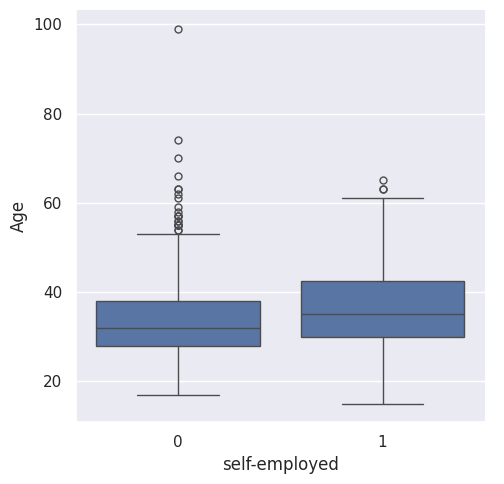

In [ ]:
sns.catplot( df , x = 'self-employed', y = 'Age' , kind = 'box')